In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.listdir("/kaggle/input/customer-segmentation-clustering")

['customer_segmentation.csv']

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.isna().sum().sum()

24

In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [17]:
df["Age"] = 2025 - df["Year_Birth"]

In [18]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [20]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [21]:
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [23]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [24]:
df["Total_Spending"] = df[spend_cols].sum(axis = 1)

In [25]:
df["Total_Spending"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2216, dtype: int64

In [26]:
df["Customer_Since"] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [27]:
df["Customer_Since"]

0       4816
1       4266
2       4465
3       4292
4       4314
        ... 
2235    4534
2236    4172
2237    4308
2238    4309
2239    4775
Name: Customer_Since, Length: 2216, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


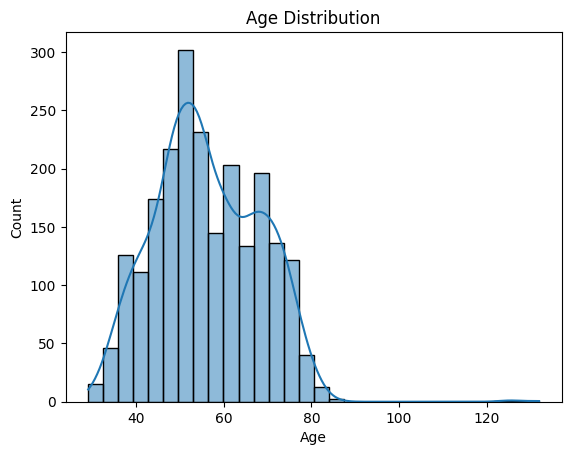

In [28]:
import seaborn as sns

sns.histplot(df["Age"], bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


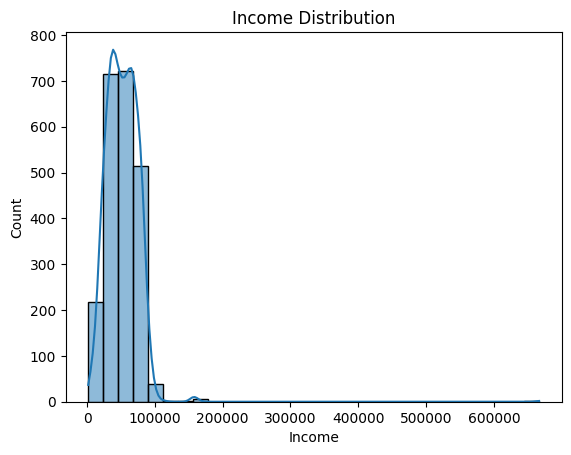

In [29]:
sns.histplot(df["Income"], bins = 30, kde = True)

plt.title("Income Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


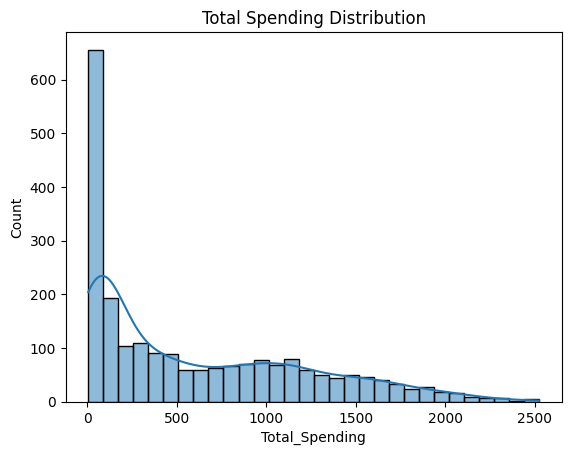

In [30]:
sns.histplot(df["Total_Spending"], bins = 30, kde = True)

plt.title("Total Spending Distribution")

plt.show()

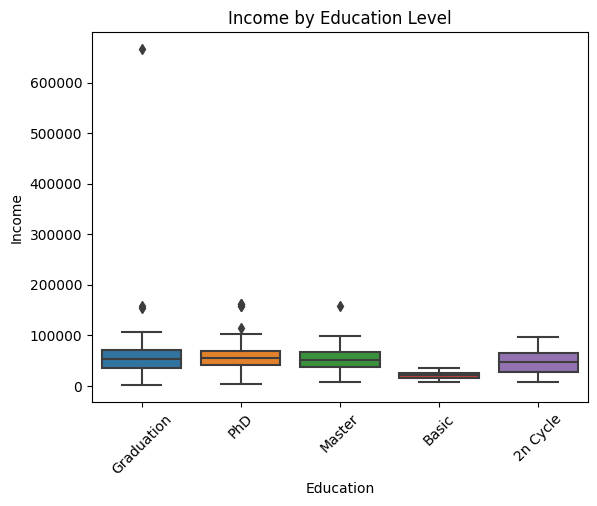

In [31]:
sns.boxplot(x= "Education", y = "Income", data = df)
plt.xticks(rotation = 45)
plt.title("Income by Education Level")
plt.show()

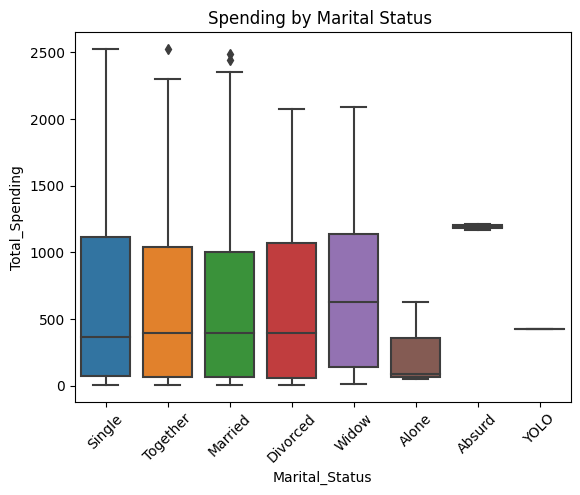

In [32]:
sns.boxplot(x = "Marital_Status", y = "Total_Spending", data = df)
plt.xticks(rotation = 45)
plt.title("Spending by Marital Status ")
plt.show()

In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [34]:

corr = df[['Income', 'Age', 'Recency', 'Total_Spending', 'NumWebPurchases','NumStorePurchases']].corr()

In [35]:
corr.head()

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240


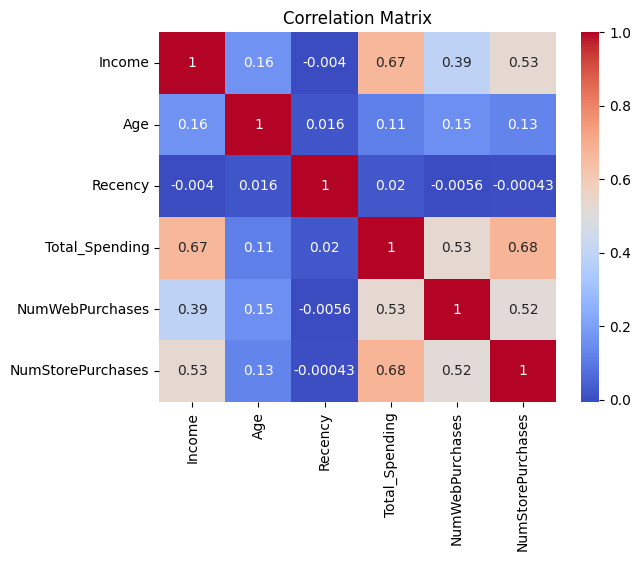

In [36]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [37]:
pivot_income = df.pivot_table(values = "Income", index = "Education", columns = "Marital_Status", aggfunc = "mean")

In [38]:
pivot_income

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


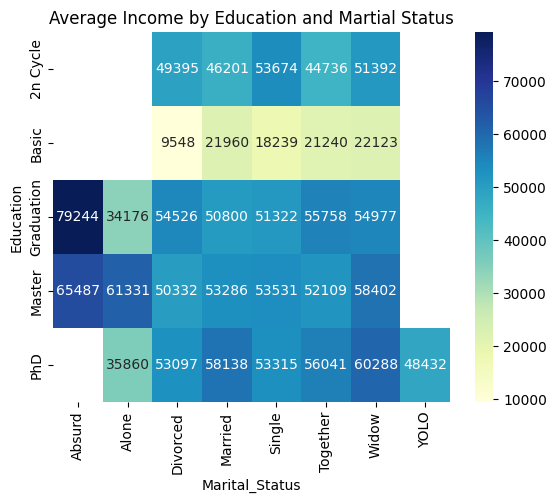

In [39]:
sns.heatmap(pivot_income, annot = True, fmt = ".0f", cmap = "YlGnBu")

plt.title("Average Income by Education and Martial Status")

plt.show()

In [ ]:
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)

In [41]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

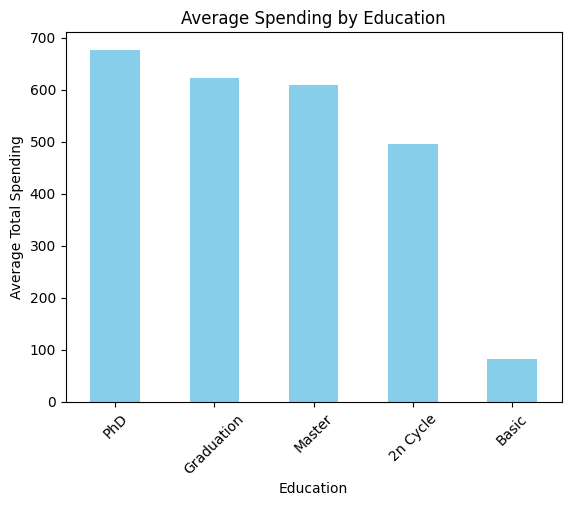

In [42]:
group1.plot(kind = "bar", color = "skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)
plt.show()

In [43]:
df["AcceptedAny"] = df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp4", "Response"]].sum(axis=1)

In [44]:
df["AcceptedAny"].unique()

array([1, 0, 2, 3, 4, 5])

In [45]:
df["AcceptedAny"] = df["AcceptedAny"].apply(lambda x:1 if x>0 else 0)

In [46]:
df["AcceptedAny"].unique()

array([1, 0])

In [47]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending = False)

In [48]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Alone       0.333333
Widow       0.328947
Single      0.303609
Divorced    0.293103
Married     0.231039
Together    0.226876
Name: AcceptedAny, dtype: float64

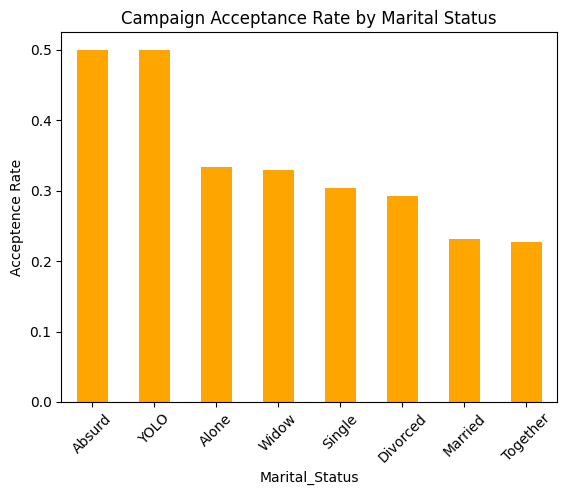

In [49]:
group2.plot(kind = "bar", color = "orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation = 45)
plt.show()

In [50]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [51]:
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]


In [52]:
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)

In [53]:
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [54]:
group3 = df.groupby("AgeGroup")["Income"].mean()

/tmp/ipykernel_39/1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


In [55]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

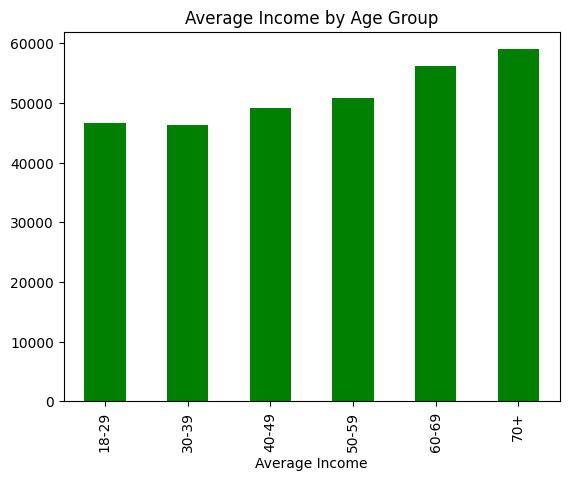

In [56]:
group3.plot(kind = 'bar', color = "green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [57]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4816,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4266,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4465,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4292,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4314,0,40-49


In [58]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [59]:
features = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumWebVisitsMonth", "Recency"]

In [60]:
X = df[features].copy()

In [61]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,7,58
1,71,46344.0,27,1,5,38
2,60,71613.0,776,8,4,26
3,41,26646.0,53,2,6,26
4,44,58293.0,422,5,5,94
...,...,...,...,...,...,...
2235,58,61223.0,1341,9,5,46
2236,79,64014.0,444,8,7,56
2237,44,56981.0,1241,2,6,91
2238,69,69245.0,843,6,3,8


In [62]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [63]:
X_scaled = Scaler.fit_transform(X)

In [64]:
X_scaled 

array([[ 0.98644293,  0.2340627 ,  1.67548812,  1.42855332,  0.69323197,
         0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, -1.12588116, -0.1315745 ,
        -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985,  1.42855332, -0.54397773,
        -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, -0.76096195,  0.28082874,
         1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438,  0.6987149 , -0.95638097,
        -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , -0.39604274,  0.69323197,
        -0.31140528]])

In [65]:
from sklearn.cluster import KMeans

In [66]:
wcss = []

In [67]:
for i in range (2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled )
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

In [68]:
wcss

[9224.34416264575,
 7986.893852452348,
 7111.693003300626,
 6524.640942468589,
 5969.781266883572,
 5506.7187563695425,
 5145.132900670354,
 4886.710481918183]

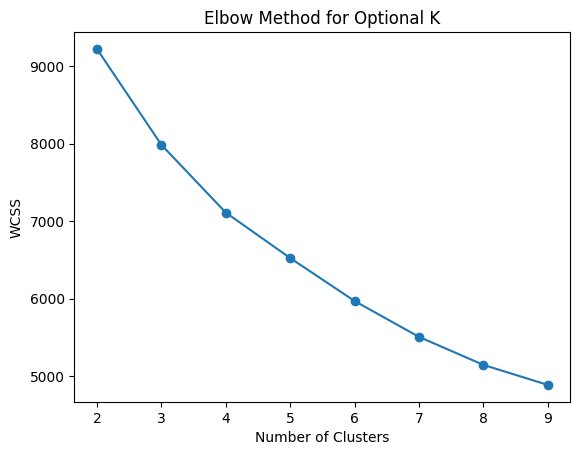

In [69]:
plt.plot(range(2,10), wcss, marker = "o")
plt.title("Elbow Method for Optional K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [70]:
kmeans = KMeans(n_clusters = 6)
df["Cluster"] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4816,1,60-69,5
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4266,0,70+,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4465,0,50-59,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4292,0,40-49,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4314,0,40-49,1


In [72]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [73]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,
0,69.148649,75301.520270,1261.442568,4.692568,2.537162,49.662162
1,48.760814,32385.984733,121.267176,2.267176,7.081425,74.882952
2,49.957895,34627.591579,130.663158,2.252632,6.461053,22.669474
3,46.044586,78961.541401,1324.423567,4.589172,2.576433,50.993631
4,68.768519,44992.839506,228.685185,2.851852,5.345679,58.861111
5,58.922705,60249.413043,899.048309,8.062802,6.384058,45.004831


In [74]:
df["Cluster"].value_counts()

Cluster
2    475
5    414
1    393
4    324
3    314
0    296
Name: count, dtype: int64

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0],pca_data[:,1]

In [76]:
pca_data

array([[ 1.51468653,  0.09638167],
       [-0.82949363, -0.02644239],
       [ 1.42664891,  0.95739167],
       ...,
       [ 0.10761048, -1.39026131],
       [ 1.46388984,  1.27120132],
       [-0.62499883,  0.2101888 ]])

In [78]:
df["PCA1"]

0       1.514687
1      -0.829494
2       1.426649
3      -1.743986
4      -0.021422
          ...   
2235    1.666836
2236    0.715915
2237    0.107610
2238    1.463890
2239   -0.624999
Name: PCA1, Length: 2216, dtype: float64

In [79]:
pca_data[:,1]

array([ 0.09638167, -0.02644239,  0.95739167, ..., -1.39026131,
        1.27120132,  0.2101888 ])

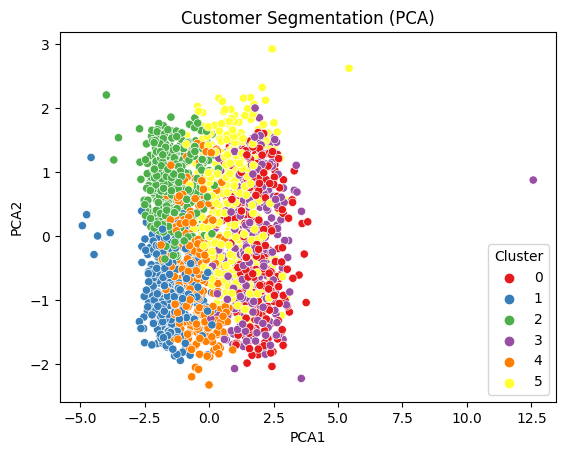

In [81]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data = df, palette = "Set1")

plt.title("Customer Segmentation (PCA)")
plt.show()

In [82]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,
0,69.148649,75301.520270,1261.442568,4.692568,2.537162,49.662162
1,48.760814,32385.984733,121.267176,2.267176,7.081425,74.882952
2,49.957895,34627.591579,130.663158,2.252632,6.461053,22.669474
3,46.044586,78961.541401,1324.423567,4.589172,2.576433,50.993631
4,68.768519,44992.839506,228.685185,2.851852,5.345679,58.861111
5,58.922705,60249.413043,899.048309,8.062802,6.384058,45.004831


# Cluster 3: "Top-Tier, Young High Spenders" (314 customers) 
# Cluster 0: "Top-Tier, Mature High Spenders" (296 customers) 
# Cluster 5: "Digital Power Shoppers" (414 customers) 
# Cluster 2: "New/Recent Low Spenders" (475 customers) 
# Cluster 1: "At-Risk Low Spenders" (393 customers) 
# Cluster 4: "Older, Moderate Low Spenders" (324 customers)